# Chapter 10 - Unsupervised Learning

[10.2 Principal Components Analysis](#10.2-Principal-Components-Analysis)
> [10.2.1 What Are Principal Components?](#10.2.1-What-Are-Principal-Components?)<br>
> [10.2.3 More on PCA](#10.2.3-More-on-PCA)

[10.4 Lab 1: Principal Components Analysis](#10.4-Lab-1:-Principal-Components-Analysis)

[10.5 Lab 2: Clustering](#10.5-Lab-2:-Clustering)
> [10.5.1 K-Means Clustering](#10.5.1-K-Means-Clustering)<br>
> [10.5.2 Hierarchical Clustering](#10.5.2-Hierarchical-Clustering)

[10.6 Lab 3: NCI60 Data Example](#10.6-Lab-3:-NCI60-Data-Example)
> [10.6.1 PCA on the NCI60 Data](#10.6.1-PCA-on-the-NCI60-Data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics.pairwise import pairwise_distances

%matplotlib inline
plt.style.use('seaborn-white')

## 10.2 Principal Components Analysis

### 10.2.1 What Are Principal Components?

In [2]:
df_heart = pd.read_csv('Data/USArrests.csv', index_col=0).dropna()
df_heart.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
X = df_heart.values

In [4]:
scaled_pca = make_pipeline(StandardScaler(), PCA(n_components=2, whiten=False))
pca = scaled_pca.named_steps['pca']
pcaX = scaled_pca.fit_transform(X)
pcaX = pcaX[:,:2]

#### FIGURE 10.1

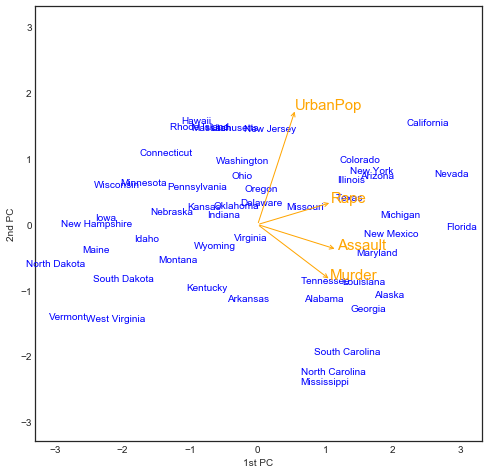

In [5]:
# the second pca component is inverted so the plot matches the book
# the original features as a function of the principal components have been scaled by 2 so they can be seen easier

fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(pcaX[:, 0], pcaX[:, 1], s=0)
ax.set_xlabel('1st PC')
ax.set_ylabel('2nd PC')

for i, txt in enumerate(df_heart.index):
    ax.annotate(txt, (pcaX[i, 0], -pcaX[i, 1]), horizontalalignment='center', verticalalignment='center', color='b')
    
components = pca.components_
for i, col in enumerate(df_heart.columns.tolist()):
    ax.annotate('', xy=(2*components[0, i], -2*components[1, i]), xytext=(0, 0), arrowprops=dict(arrowstyle="->", ec="orange"))
    ax.text(2*components[0, i], -2*components[1, i], col, size=15, color='orange')
    
ax.set_ylim(ax.get_xlim());

### 10.2.3 More on PCA

In [6]:
scaled_pca = make_pipeline(StandardScaler(), PCA())
pca = scaled_pca.named_steps['pca']
scaled_pca.fit(X)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

#### FIGURE 10.4

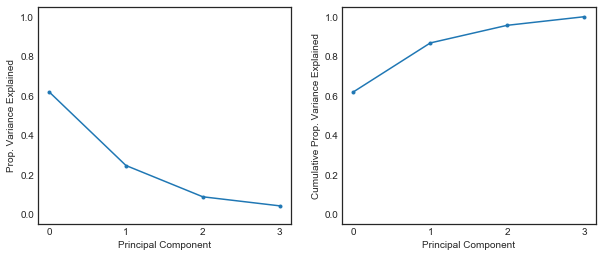

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

ax1.plot(range(0, pca.n_components_), pca.explained_variance_ratio_, '.-')
ax1.set_ylabel('Prop. Variance Explained')

ax2.plot(range(0, pca.n_components_), np.cumsum(pca.explained_variance_ratio_), '.-')
ax2.set_ylabel('Cumulative Prop. Variance Explained')

for ax in (ax1, ax2):
    ax.set_ylim(bottom=-0.05, top=1.05)
    ax.get_xaxis().set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    ax.set_xlabel('Principal Component')

## 10.3 Clustering Methods

## 10.4 Lab 1: Principal Components Analysis

Already done in [10.2 Principal Components Analysis](#10.2-Principal-Components-Analysis)

## 10.5 Lab 2: Clustering

### 10.5.1 K-Means Clustering

In [8]:
# generate random data
X = np.random.normal(size=(50,2))
X[:25, 0] += 3
X[:25, 1] -= 2

In [9]:
kmeans = KMeans(n_clusters=2, n_init=20)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

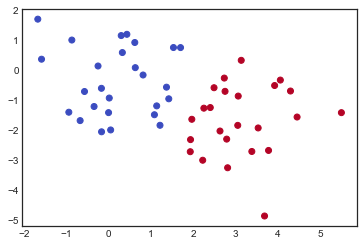

In [10]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap=plt.get_cmap('coolwarm'))

In [11]:
kmeans = KMeans(n_clusters=3, n_init=20)
kmeans.fit(X)
print('Cluster means:\n', kmeans.cluster_centers_)
print('Clustering vector:\n', kmeans.labels_)
print('Total sum of squares to cluster:\n', kmeans.inertia_)

Cluster means:
 [[ 0.16825223  0.70500355]
 [ 3.11756754 -1.683071  ]
 [ 0.24825019 -1.28915693]]
Clustering vector:
 [1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 0 0 0 0 2 2
 2 0 2 2 0 2 0 0 0 0 0 2 0]
Total sum of squares to cluster:
 78.52399286287479


In [12]:
# compare different n_init
kmeans = KMeans(n_clusters=3, n_init=1)
kmeans.fit(X)
print(kmeans.inertia_)
kmeans = KMeans(n_clusters=3, n_init=20)
kmeans.fit(X)
print(kmeans.inertia_)

80.8614571332361
78.52399286287479


### 10.5.2 Hierarchical Clustering

In [13]:
agg_complete = AgglomerativeClustering(affinity='euclidean', linkage='complete').fit(X)
agg_average = AgglomerativeClustering(affinity='euclidean', linkage='average').fit(X)
agg_ward = AgglomerativeClustering(affinity='euclidean', linkage='ward').fit(X)

In [14]:
def plot_dendrogram(model, labels=None, **kwargs):
    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)
    
    if labels is None:
        labels = model.labels_
    else:
        labels = [f'{lab1}_{lab2}' for lab1, lab2 in zip(model.labels_, labels)]

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, labels=labels, **kwargs)

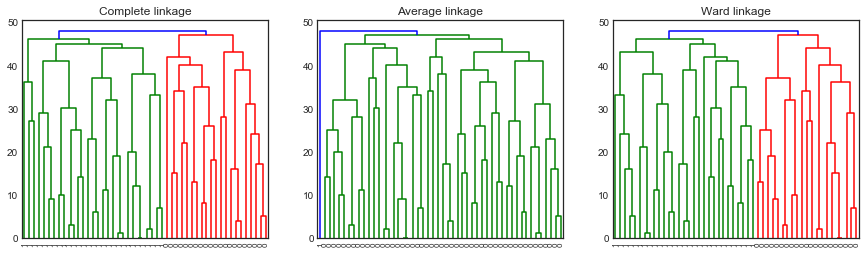

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))

color_threshold = 48

ax1.set_title('Complete linkage')
ax2.set_title('Average linkage')
ax3.set_title('Ward linkage')

plot_dendrogram(agg_complete, color_threshold=color_threshold, ax=ax1)
plot_dendrogram(agg_average, color_threshold=color_threshold, ax=ax2)
plot_dendrogram(agg_ward, color_threshold=color_threshold, ax=ax3)

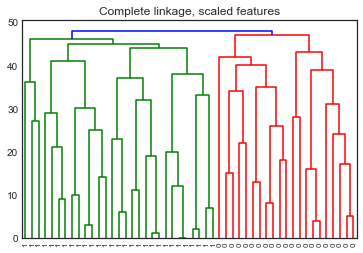

In [16]:
# with scaling
agg_complete_scaled = AgglomerativeClustering(affinity='euclidean', linkage='complete').fit(StandardScaler().fit_transform(X))
plt.title('Complete linkage, scaled features')
plot_dendrogram(agg_complete, color_threshold=color_threshold)

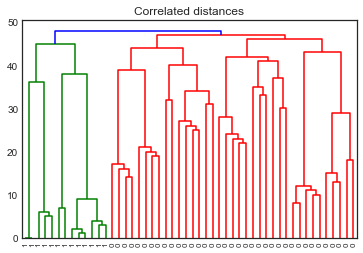

In [17]:
# correlated distances
X3 = np.random.normal(size=(50,3))

corr_X = pairwise_distances(X3, metric="correlation")
agg_corr = AgglomerativeClustering(affinity='precomputed', linkage='complete').fit(StandardScaler().fit_transform(corr_X))
plt.title('Correlated distances')
plot_dendrogram(agg_corr, color_threshold=color_threshold)

## 10.6 Lab 3: NCI60 Data Example

In [18]:
from pandas.io.json import json_normalize

In [19]:
df_ncl60_raw = pd.read_json('Data/NCI60.json', orient='records')
df_ncl60_raw.head()

,data,labs
0,"{'1': 0.30000000000000004, '2': 1.18, '3': 0.5...",CNS
1,"{'1': 0.67996, '2': 1.29, '3': 0.1699600000000...",CNS
2,"{'1': 0.9400000000000001, '2': -0.04, '3': -0....",CNS
3,"{'1': 0.28, '2': -0.31, '3': 0.68, '4': -0.81,...",RENAL
4,"{'1': 0.485, '2': -0.465, '3': 0.395, '4': 0.9...",BREAST


In [20]:
df_ncl60_raw.data.head()

0    {'1': 0.30000000000000004, '2': 1.18, '3': 0.5...
1    {'1': 0.67996, '2': 1.29, '3': 0.1699600000000...
2    {'1': 0.9400000000000001, '2': -0.04, '3': -0....
3    {'1': 0.28, '2': -0.31, '3': 0.68, '4': -0.81,...
4    {'1': 0.485, '2': -0.465, '3': 0.395, '4': 0.9...
Name: data, dtype: object

In [22]:
df_ncl60_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
data    64 non-null object
labs    64 non-null object
dtypes: object(2)
memory usage: 1.1+ KB


In [24]:
# get data
df_ncl60 = json_normalize(df_ncl60_raw.data)
# rename columns so they are integers and not strings
df_ncl60.rename(columns=lambda name: int(name), inplace=True)
# sort columns 
df_ncl60 = df_ncl60.reindex(columns=sorted(df_ncl60.columns))
# each row is a type of cancer
df_ncl60.index = pd.CategoricalIndex(df_ncl60_raw.labs)
df_ncl60.head()

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
labs,,,,,,,,,,,,,,,,,,,,,
CNS,0.30000,1.180,0.55000,1.14000,-0.26500,-7.000000e-02,0.35000,-0.31500,-0.450000,-0.654980,...,-0.99002,0.00000,0.03000,-0.17500,0.62998,-0.03000,0.00,0.28000,-0.34000,-1.930
CNS,0.67996,1.290,0.16996,0.37996,0.46496,5.799600e-01,0.69996,0.72496,-0.040039,-0.285020,...,-0.27006,-0.30004,-0.25004,-0.53504,0.10994,-0.86004,-1.25,-0.77004,-0.39004,-2.000
CNS,0.94000,-0.040,-0.17000,-0.04000,-0.60500,0.000000e+00,0.09000,0.64500,0.430000,0.475020,...,0.31998,0.12000,-0.74000,-0.59500,-0.27002,-0.15000,0.00,-0.12000,-0.41000,0.000
RENAL,0.28000,-0.310,0.68000,-0.81000,0.62500,-1.387800e-17,0.17000,0.24500,0.020000,0.095019,...,-1.24000,-0.11000,-0.16000,0.09500,-0.35002,-0.30000,-1.15,1.09000,-0.26000,-1.100
BREAST,0.48500,-0.465,0.39500,0.90500,0.20000,-5.000000e-03,0.08500,0.11000,0.235000,1.490000,...,0.55498,-0.77500,-0.51500,-0.32000,0.63498,0.60500,0.00,0.74500,0.42500,0.145


In [25]:
df_ncl60.index.value_counts()

RENAL          9
NSCLC          9
MELANOMA       8
COLON          7
BREAST         7
OVARIAN        6
LEUKEMIA       6
CNS            5
PROSTATE       2
UNKNOWN        1
MCF7D-repro    1
MCF7A-repro    1
K562B-repro    1
K562A-repro    1
Name: labs, dtype: int64

In [26]:
df_ncl60.index.codes

array([ 1,  1,  1, 12,  0,  1,  1,  0,  9,  9, 12, 12, 12, 12, 12, 12, 12,
        0,  9, 12, 13, 10,  8, 11, 10, 10, 10, 10, 10, 11,  9,  9,  9,  5,
        4,  3,  5,  5,  5,  5,  5,  2,  2,  2,  2,  2,  2,  2,  6,  0,  7,
        0,  9,  9,  9,  8,  0,  0,  8,  8,  8,  8,  8,  8], dtype=int8)

### 10.6.1 PCA on the NCI60 Data

In [27]:
scaled_pca = make_pipeline(StandardScaler(), PCA())
pca = scaled_pca.named_steps['pca']
pcaX = scaled_pca.fit_transform(df_ncl60)
pcaX = pcaX[:,:3]

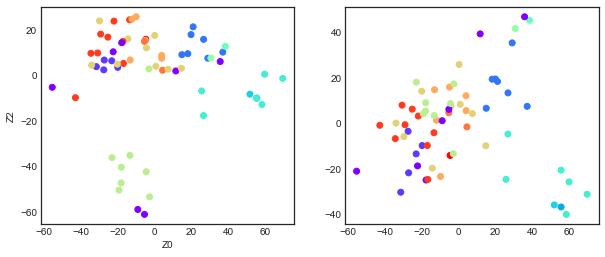

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

ax1.scatter(pcaX[:,0], -pcaX[:,1], c=df_ncl60.index.codes, cmap=plt.get_cmap('rainbow'))
ax1.set_xlabel('Z0')
ax1.set_ylabel('Z1')
ax2.scatter(pcaX[:,0], pcaX[:,2], c=df_ncl60.index.codes, cmap=plt.get_cmap('rainbow'))
ax1.set_xlabel('Z0')
ax1.set_ylabel('Z2');

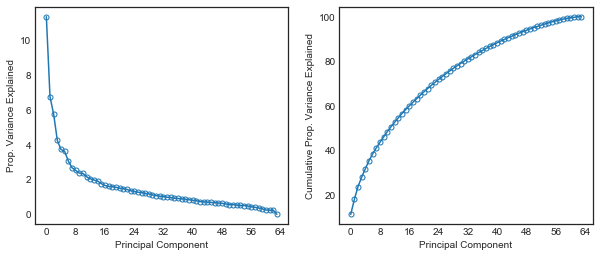

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

ax1.plot(range(0, pca.n_samples_), pca.explained_variance_ratio_*100, 'o-', markersize=5, markerfacecolor="None", markeredgewidth=1)
ax1.set_ylabel('Prop. Variance Explained')

ax2.plot(range(0, pca.n_samples_), np.cumsum(pca.explained_variance_ratio_)*100, 'o-', markersize=5, markerfacecolor="None", markeredgewidth=1)
ax2.set_ylabel('Cumulative Prop. Variance Explained')

for ax in (ax1, ax2):
    #ax.set_ylim(bottom=-0.05, top=1.05)
    ax.get_xaxis().set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    ax.set_xlabel('Principal Component')

### 10.6.2 Clustering the Observations of the NCI60 Data

In [30]:
agg_complete = AgglomerativeClustering(affinity='euclidean', linkage='complete').fit(StandardScaler().fit_transform(df_ncl60))
agg_average = AgglomerativeClustering(affinity='euclidean', linkage='average').fit(StandardScaler().fit_transform(df_ncl60))

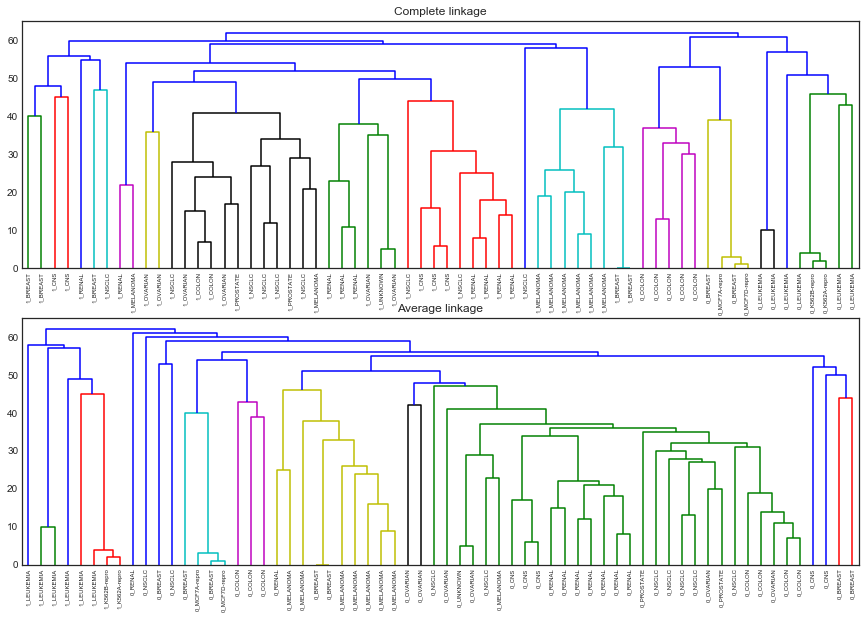

In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10))

color_threshold = 48

ax1.set_title('Complete linkage')
ax2.set_title('Average linkage')

plot_dendrogram(agg_complete, color_threshold=color_threshold, ax=ax1, labels=df_ncl60.index)
plot_dendrogram(agg_average, color_threshold=color_threshold, ax=ax2, labels=df_ncl60.index)

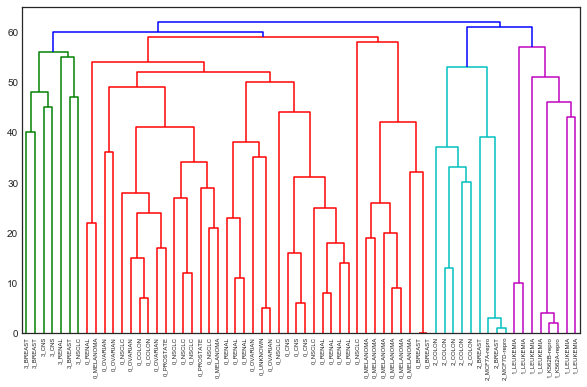

In [32]:
agg_complete = AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=4).fit(StandardScaler().fit_transform(df_ncl60))
fig, ax = plt.subplots(1, 1, figsize=(10,6))
plot_dendrogram(agg_complete, color_threshold=60, ax=ax, labels=df_ncl60.index)

#### K-means

In [33]:
kmeans = KMeans(n_clusters=4, n_init=20).fit(df_ncl60)
print('Kmeans:\n', kmeans.labels_)
print('Hierarchical:\n', agg_complete.labels_)

Kmeans:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 0 3 3 3 3 3 3 3 3 3 3 0 0 0 2 2 2 2 2 2 2 2 2]
Hierarchical:
 [0 0 0 0 3 3 3 3 0 0 0 0 0 0 0 0 0 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0]


In [34]:
pd.crosstab(kmeans.labels_, agg_complete.labels_, rownames = ['K-Means'], colnames = ['Hierarchical'])

Hierarchical,0,1,2,3
K-Means,,,,
0,30,0,0,7
1,0,8,0,0
2,9,0,0,0
3,1,0,9,0


#### Use PCA first

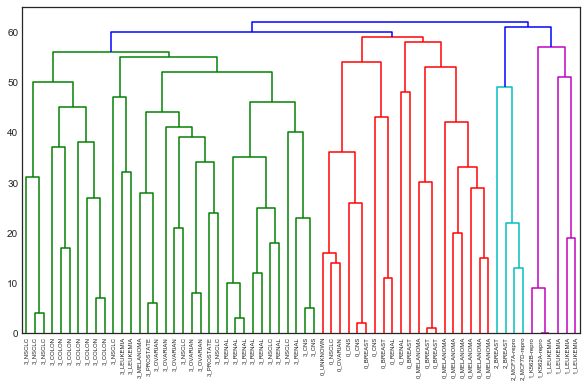

In [35]:
model = make_pipeline(StandardScaler(), PCA(n_components=5), AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=4))
model.fit(df_ncl60)
fig, ax = plt.subplots(1, 1, figsize=(10,6))
plot_dendrogram(model.named_steps['agglomerativeclustering'], color_threshold=60, ax=ax, labels=df_ncl60.index)